## ARIMA - Auto Regression Integrated Moving Average

- Integrated : To handle trend, 

Note : To handle seasonality, we will see SARIMA model

### Steps

- Step 1: Use differencing to remove trend
- Step 2 : Use AR to do forecasting
- Step 3 : Use MA on residuals to update the forecast
- Step 4 : Add trend and seasonality to get the forecasted value

### Parameter Needed In Using ARIMA Model

   - P(AR) : Order of autoregression i.e how many lag variable to choose
   - D(I) : Order of integration, i.e number of differencing needed
   - Q(MA) : Order of moving average i.e what is the window size for moving average


# ARIMA MODEL

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('/Users/mac/Documents/dataframe1.csv',header=0,parse_dates=[0])

In [3]:
dataframe.head()

,DATE,H1
0,2019-11-01,16.0
1,2019-11-02,21.0
2,2019-11-03,17.0
3,2019-11-04,12.0
4,2019-11-05,26.0


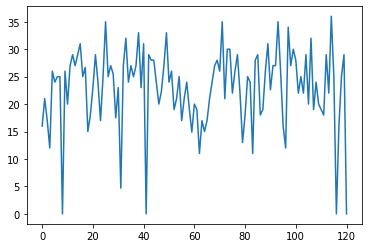

In [4]:
dataframe['H1'].plot()

Trend is polynomial
D = 2
incase of linear trend use D = 1

## Autocorrelation Plot 

to select Q parameter we need to plot autocorrelation

In [5]:
from pandas.plotting import autocorrelation_plot as ap

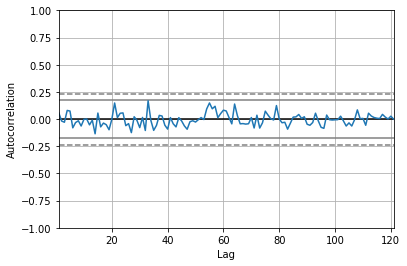

In [6]:
ap(dataframe['H1'])

 P = 35
 
 ### Partial Autocorrelation Graph

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf as pp

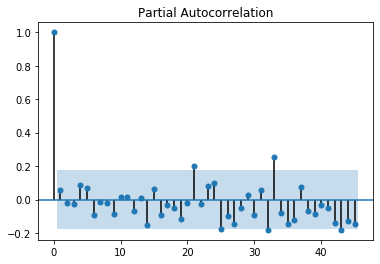

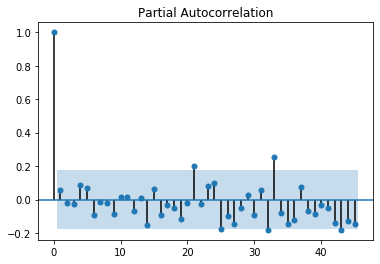

In [8]:
pp(dataframe['H1'],lags=45)

In [9]:
q = 21

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
model = ARIMA(dataframe['H1'], order=(20,29,2))

ValueError: d > 2 is not supported

In [15]:
model_fit = model.fit()

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.H1   No. Observations:                  120
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -406.562
Method:                       css-mle   S.D. of innovations              6.978
Date:                Sat, 29 Aug 2020   AIC                            825.123
Time:                        09:54:57   BIC                            841.848
Sample:                             1   HQIC                           831.916
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.020     -0.057      0.955      -0.040       0.037
ar.L1.D.H1    -0.8908      0.096     -9.273      0.000      -1.079      -0.703
ar.L2.D.H1     0.0385      0.096      0.400      0.689      -0.150       0.227
ma.L1.D.H1  2.826e-06      0.034   8.38e-05      1.000      -0.066       0.066
ma.L2.D.H1    -1.0000      0.034    -29.636      0.000      -1.066      -0.934
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0729           +0.0000j            1.0729            0.5000
AR.2           24.2374           +0.0000j           24.2374            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""